In [4]:
import scipy
import serial
import time
import csv
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.signal as signal
from scipy.signal import find_peaks
from scipy import fftpack
from scipy.optimize import curve_fit
from scipy.stats import norm
import statistics

In [5]:
fish_number =4
bn = 624
fn =631
ROI = 'heart'

# Sensors 

In [6]:
A1 = "20210714-150307_peixe1.csv"
A2 = "20210714-152517_peixe2.csv"
A3_1 = "20210714-155358_peixe3.1.csv"
A3_2 = "20210714-160833_peixe3.2.csv"
A4 = "20210714-162911_peixe4.csv"

data=pd.read_csv(A4)
data.columns = ['Tempo','Amplitude', 'Temperatura']
begin= int(bn/0.01)- int(10.92/0.01)
finish = int(fn/0.01)- int(10.92/0.01)
# print(finish)

In [7]:
N  = 2                 # Filter order
Wn = [0.002, 0.08]       # Cutoff frequency
B, A = signal.butter(N, Wn,'bandpass', output='ba')
smooth_data = signal.filtfilt(B,A, data['Amplitude'][begin:finish])

In [11]:
smooth_data = smooth_data/max(smooth_data)
peaks, _ = find_peaks(smooth_data, height = 0, distance = 35, threshold = 0.00001) #retorna os indices dos picos 
print(len(peaks))

10


In [12]:
#tempos dos picos
tt = list(data['Tempo'][begin:finish])
td = []
for m in range(len(peaks)):
    u = peaks[m]
    td.append(tt[u])
print(td)

[624.49, 625.18, 625.84, 626.61, 627.29, 627.99, 629.05, 629.73, 630.38, 630.86]


# Video 

In [13]:
f = open("Mean-peixe4-624-631.txt", "r")
s= f.read()
# print(s)
avg = list(s.split('\n'))
frame = []
time = []
video_dur = fn-bn
nr_frames= len(avg)-1

a = video_dur/nr_frames
fps = 30 #freq de amostragem 30Hz

for n in range(1,nr_frames+1):
    frame.append(n)
    time.append(a*n + bn)
    avg[n-1] = float(avg[n-1])

avg =np.array(avg[:-1])

m = avg[:]
t= time[:]

In [14]:
N1  = 2                 # Filter order
Wn1 = [0.02, 0.2]       # Cutoff frequency
B1, A1 = signal.butter(N1, Wn1,'bandpass', output='ba')
smooth_data1 = signal.filtfilt(B1,A1, m)


In [16]:
peaks1, _ = find_peaks(smooth_data1, height =-1, distance = 15, threshold = 0.00001) #retorna os indices dos picos 
print(len(peaks1))

10


In [17]:
td1 = []
for m in range(len(peaks1)):
    u = peaks1[m]
    td1.append(t[u])
print(td1)

[624.6129032258065, 625.2258064516129, 626.0645161290323, 626.7096774193549, 627.3225806451613, 628.3225806451613, 628.9354838709677, 629.6129032258065, 630.1612903225806, 630.7741935483871]


<IPython.core.display.Javascript object>


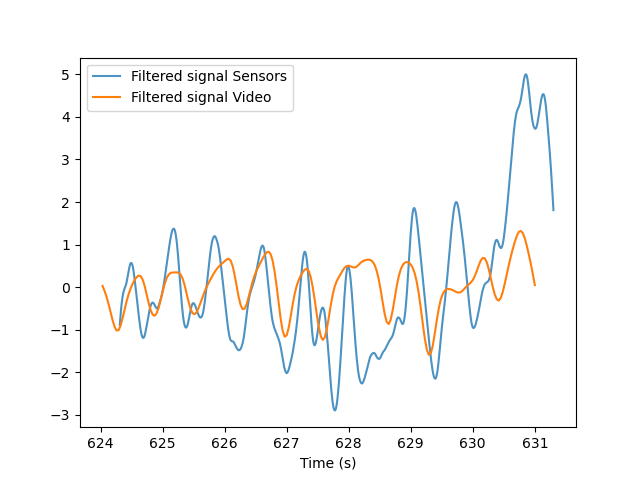

In [18]:
plt.plot(data['Tempo'][begin:finish],smooth_data*5,'k-', color = 'C0', label='Filtered signal Sensors', alpha = 0.8)
plt.plot(t,smooth_data1,'-',color = 'C1', label='Filtered signal Video', alpha = 1)
plt.legend(loc = 'best')
plt.xlabel('Time (s)')
plt.show()

<IPython.core.display.Javascript object>


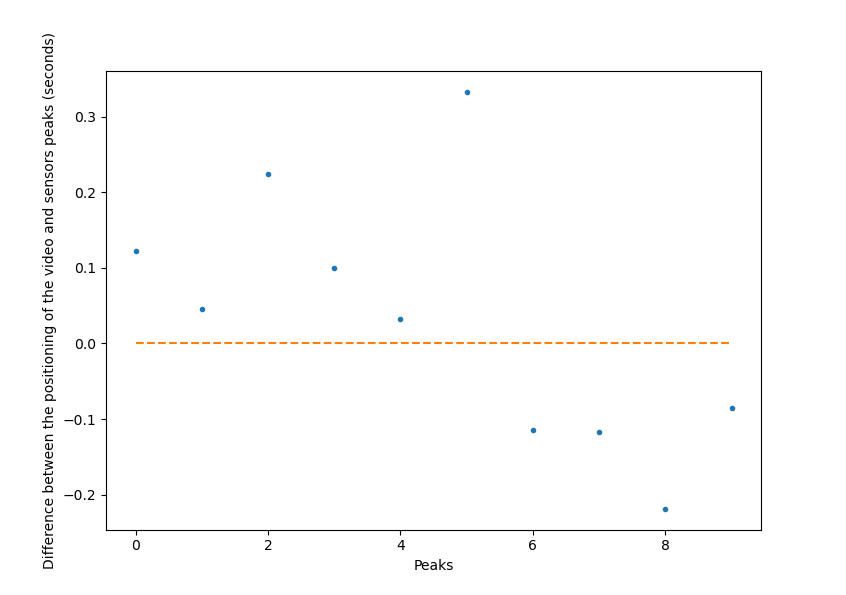

Text(0, 0.5, 'Difference between the positioning of the video and sensors peaks (seconds)')

In [19]:
dif = []
for p in range(len(td1)):
    dif.append(td1[p]-td[p])
    
plt.plot(dif,'.', color="C0")
plt.plot(np.zeros_like(dif), "--", color="C1")
plt.xlabel('Peaks')
plt.ylabel('Difference between the positioning of the video and sensors peaks (seconds)')